In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from scipy import stats
from sklearn import neighbors, datasets
from sklearn import linear_model as lm
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
import math

df = pd.read_csv('wdbc.csv')
df['diagnosis'] = pd.Categorical(df.diagnosis).codes

<h1> 1 Classification

<h3> 1.1 Data Description

In [13]:
summaryDF = df[df.columns.difference(['id', 'diagnosis'])]

summary = pd.DataFrame(index=summaryDF.columns)
summary['Mean'] = summaryDF.mean()
summary['Min'] = summaryDF.min()
summary['Max'] = summaryDF.max()
summary['STD'] = summaryDF.std()
summary['NumMissing'] = summaryDF.isnull().sum()
summary.index.name = "Variables"
l = []
listofname = summaryDF.columns
for x in listofname:
    l.append(np.corrcoef(df[x], df['diagnosis'])[0,1])
summary["Correlation"] = l

print(len(summaryDF))
print(summary)

569
                         Mean         Min         Max         STD  NumMissing  \
Variables                                                                       
area.mean          654.889104  143.500000  2501.00000  351.914129           0   
area.se             40.337079    6.802000   542.20000   45.491006           0   
area.worst         880.583128  185.200000  4254.00000  569.356993           0   
compactness.mean     0.104341    0.019380     0.34540    0.052813           0   
compactness.se       0.025478    0.002252     0.13540    0.017908           0   
compactness.worst    0.254265    0.027290     1.05800    0.157336           0   
concavity.mean       0.088799    0.000000     0.42680    0.079720           0   
concavity.se         0.031894    0.000000     0.39600    0.030186           0   
concavity.worst      0.272188    0.000000     1.25200    0.208624           0   
concpoints.mean      0.048919    0.000000     0.20120    0.038803           0   
concpoints.se        0.0

<h3> 1.2 Logisitic Regression

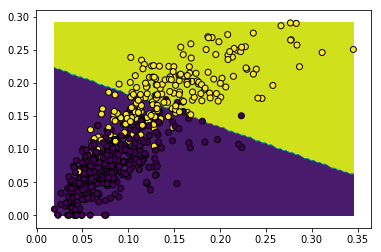

In [16]:
X = df[['compactness.mean','concpoints.worst']].values
Y = df['diagnosis']
LogReg = lm.LogisticRegression()
LogReg.fit(X, Y)
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = LogReg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z)
plt.scatter(df['compactness.mean'], df['concpoints.worst'], c=df['diagnosis'], edgecolor='black')
plt.show()

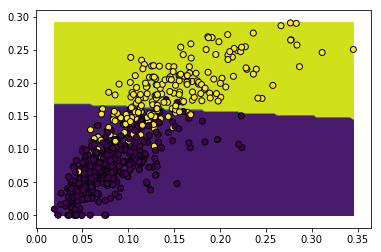

In [17]:
X = df[['compactness.mean','concpoints.worst']]
Y = df['diagnosis']
X['x**2'] = X['compactness.mean'] ** 3
X['y**2'] = X['concpoints.worst'] ** 3
X['x*y'] = X['compactness.mean'] * df['concpoints.worst']
X['x+y'] = X['compactness.mean'] - df['concpoints.worst']

LogReg = lm.LogisticRegression()
LogReg.fit(X, Y)
Z = LogReg.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel()**3, yy.ravel()**3, xx.ravel() * yy.ravel(), xx.ravel() - yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z)
plt.scatter(df['compactness.mean'], df['concpoints.worst'], c=df['diagnosis'], edgecolor='black')
plt.show()

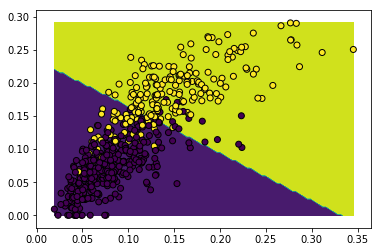

In [18]:
X = df[['compactness.mean','concpoints.worst']]
Y = df['diagnosis']
X['x**2'] = X['compactness.mean'] ** 2
X['y**2'] = X['concpoints.worst'] ** 2
X['x*y'] = X['compactness.mean'] * df['concpoints.worst']
X['x+y'] = X['compactness.mean'] + df['concpoints.worst']

LogReg = lm.LogisticRegression()
LogReg.fit(X, Y)
Z = LogReg.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2, xx.ravel() * yy.ravel(), xx.ravel() + yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z)
plt.scatter(df['compactness.mean'], df['concpoints.worst'], c=df['diagnosis'], edgecolor='black')
plt.show()

In [19]:
X = df[df.columns.difference(['id', 'diagnosis'])]
Y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

LogReg = lm.LogisticRegression()
LogReg.fit(X_train, y_train)
predictions = LogReg.predict(X_test)
accuracy = metrics.r2_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
print("Logistic Regression")
print("Accuracy", accuracy)
print("Recall", recall)
print("Precision", precision)

print()
print("Cross Validation")
LogReg = lm.LogisticRegression()
LogReg.fit(X_train, y_train)
predictions = cross_val_predict(LogReg, X, Y, cv=100)
accuracy = metrics.r2_score(Y, predictions)
recall = metrics.recall_score(Y, predictions)
precision = metrics.precision_score(Y, predictions)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print()
print()

for l in np.linspace(10**-6, 10**6, 10):
    LogReg = lm.LogisticRegression(C=l)
    LogReg.fit(X_train, y_train)
    predictions = cross_val_predict(LogReg, X, Y, cv=100)
    accuracy = metrics.r2_score(Y, predictions)
    recall = metrics.recall_score(Y, predictions)
    precision = metrics.precision_score(Y, predictions)
    print("Lambda:", l)
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print()
    print()

Logistic Regression
Accuracy 0.809555629803
Recall 0.878048780488
Precision 1.0

Cross Validation
Accuracy: 0.789493155753
Recall: 0.919811320755
Precision: 0.946601941748


Lambda: 1e-06
Accuracy: 0.594022514666
Recall: 0.806603773585
Precision: 0.929347826087


Lambda: 111111.111112
Accuracy: 0.819565562074
Recall: 0.938679245283
Precision: 0.947619047619


Lambda: 222222.222223
Accuracy: 0.819565562074
Recall: 0.933962264151
Precision: 0.951923076923


Lambda: 333333.333334
Accuracy: 0.812047460494
Recall: 0.938679245283
Precision: 0.943127962085


Lambda: 444444.444445
Accuracy: 0.812047460494
Recall: 0.929245283019
Precision: 0.951690821256


Lambda: 555555.555556
Accuracy: 0.819565562074
Recall: 0.938679245283
Precision: 0.947619047619


Lambda: 666666.666667
Accuracy: 0.827083663654
Recall: 0.943396226415
Precision: 0.947867298578


Lambda: 777777.777778
Accuracy: 0.804529358913
Recall: 0.933962264151
Precision: 0.942857142857


Lambda: 888888.888889
Accuracy: 0.804529358913
Rec

In [21]:
X = df[df.columns.difference(['id', 'diagnosis'])]
Y = df['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

from sklearn.linear_model import LogisticRegression
logreg = lm.LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred_class))
print(metrics.confusion_matrix(Y_test, Y_pred_class))
cm3 = metrics.confusion_matrix(Y_test, Y_pred_class)
TP = cm3[1][1]
TN = cm3[0][0]
FP = cm3[0][1]
FN = cm3[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

0.978723404255
[[116   1]
 [  3  68]]
True Positives: 68
True Negatives: 116
False Positives: 1
False Negatives: 3


<h3> 1.3 k-NN

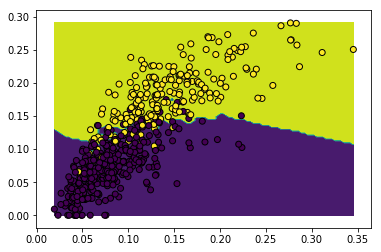

In [22]:
X = df[['compactness.mean','concpoints.worst']].values
Y = df['diagnosis']
knn=neighbors.KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, Y)
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z)
plt.scatter(df['compactness.mean'], df['concpoints.worst'], c=df['diagnosis'], edgecolor='black')
plt.show()

In [26]:
X = df[df.columns.difference(['id', 'diagnosis'])]
Y = df['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

from  sklearn.neighbors  import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
recall = metrics.recall_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
cm = metrics.confusion_matrix(Y_test, Y_pred)
print("Accuracy", accuracy)
print("Recall", recall)
print("Precision", precision)
print(cm)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

Accuracy 0.88829787234
Recall 0.74025974026
Precision 0.98275862069
[[110   1]
 [ 20  57]]
True Positives: 57
True Negatives: 110
False Positives: 1
False Negatives: 20


<h3> 1.4 Support Vector Machines

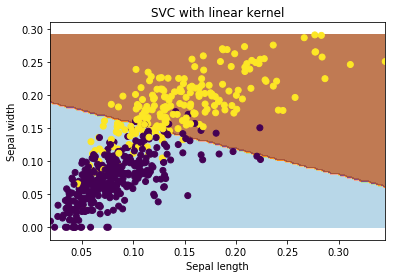

In [91]:
from sklearn.svm import SVC

X = df[['compactness.mean','concpoints.worst']].values
y = df['diagnosis']

svc = SVC(kernel='linear', C=1,gamma=1).fit(X, y)

x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
plt.subplot(1, 1, 1)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

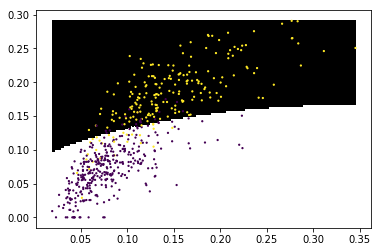

In [77]:
model = SVC(kernel='rbf', C=1000, gamma=1) #also try kernel=linear rbf or poly. or other gamma values #

model.fit(X, y)

x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
z=np.zeros((100,100))

xv, yv = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100), sparse=False, indexing='ij')
z = model.predict(np.c_[xv.ravel(), yv.ravel()])

    # Put the result into a color plot
z = z.reshape(xv.shape)
plt.figure()
plt.pcolormesh(xv, yv, z, cmap='binary')
plt.scatter(df['compactness.mean'], df['concpoints.worst'], c=df['diagnosis'],s = 1.5)

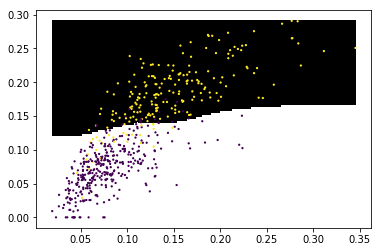

In [92]:
model = SVC(kernel='rbf', C=1000, gamma=100) #also try kernel=linear rbf or poly. or other gamma values #

model.fit(X, y)

x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
z=np.zeros((100,100))

xv, yv = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100), sparse=False, indexing='ij')
z = model.predict(np.c_[xv.ravel(), yv.ravel()])

    # Put the result into a color plot
z = z.reshape(xv.shape)
plt.figure()
plt.pcolormesh(xv, yv, z, cmap='binary')
plt.scatter(df['compactness.mean'], df['concpoints.worst'], c=df['diagnosis'],s = 1.5)

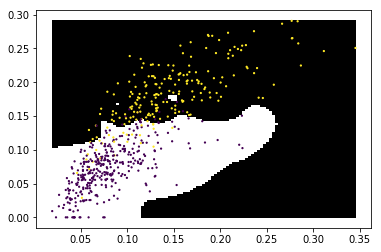

In [95]:
model = SVC(kernel='rbf', C=1000, gamma=1000) #also try kernel=linear rbf or poly. or other gamma values #

model.fit(X, y)

x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
z=np.zeros((100,100))

xv, yv = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100), sparse=False, indexing='ij')
z = model.predict(np.c_[xv.ravel(), yv.ravel()])

    # Put the result into a color plot
z = z.reshape(xv.shape)
plt.figure()
plt.pcolormesh(xv, yv, z, cmap='binary')
plt.scatter(df['compactness.mean'], df['concpoints.worst'], c=df['diagnosis'],s = 1.5)

In [96]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = df[df.columns.difference(['id', 'diagnosis'])]
Y = df['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

from  sklearn.neighbors  import KNeighborsClassifier
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
pipe_svc.fit(X_train, Y_train)
Y_pred = pipe_svc.predict(X_test)
recall = metrics.recall_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
cm = metrics.confusion_matrix(Y_test, Y_pred)
print("Accuracy", accuracy)
print("Recall", recall)
print("Precision", precision)
print(cm)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)


Accuracy 0.984042553191
Recall 0.972222222222
Precision 0.985915492958
[[115   1]
 [  2  70]]
True Positives: 70
True Negatives: 115
False Positives: 1
False Negatives: 2


<h3> 1.5 Classification Trees

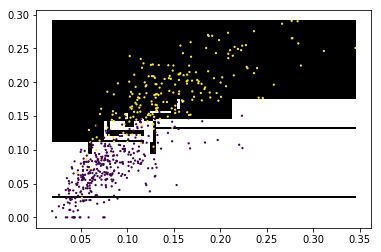

In [102]:
from sklearn.tree import DecisionTreeClassifier
X = df[['compactness.mean','concpoints.worst']].values
y = df['diagnosis']

tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
tree = tree.fit(X, y)
#Y_train_pred = tree.predict(X_train)
#Y_test_pred = tree.predict(X_test)

x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
z=np.zeros((100,100))

xv, yv = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
z = tree.predict(np.c_[xv.ravel(), yv.ravel()])

    # Put the result into a color plot
z = z.reshape(xv.shape)
plt.figure()
plt.pcolormesh(xv, yv, z, cmap='binary')
plt.scatter(df['compactness.mean'], df['concpoints.worst'], c=df['diagnosis'],s = 1.5)

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
tree = tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
recall = metrics.recall_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
cm = metrics.confusion_matrix(Y_test, Y_pred)
print("Accuracy", accuracy)
print("Recall", recall)
print("Precision", precision)
print(cm)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

Accuracy 0.86170212766
Recall 0.793650793651
Precision 0.793650793651
[[112  13]
 [ 13  50]]
True Positives: 50
True Negatives: 112
False Positives: 13
False Negatives: 13


<h3> 1.6 bagged logistic regression

In [105]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0, 
                        max_features=1.0, bootstrap=True, bootstrap_features=False)
bag = bag.fit(X_train, Y_train)
Y_pred = bag.predict(X_test)
recall = metrics.recall_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
cm = metrics.confusion_matrix(Y_test, Y_pred)
print("Accuracy", accuracy)
print("Recall", recall)
print("Precision", precision)
print(cm)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

Accuracy 0.893617021277
Recall 0.857142857143
Precision 0.830769230769
[[114  11]
 [  9  54]]
True Positives: 54
True Negatives: 114
False Positives: 11
False Negatives: 9


<h3> 1.7 How did the different methods perform?

For the features I chose I felt the the logistic regression performed the best having an accuracy score 
of 0.978723404255 and a false positive of 1, false nagative of 3, true positives of 68 and true negatives of 116.
While the performace of the SVM had the highest accuracy of accuracy 0.984042553191 of precision 0.985915492958
it may have potential for overfitting the model.

<h1> 2 Regression

<h3> 2.1 Data Description

In [36]:
df2= pd.read_csv('Hitters2.csv')
df2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [26]:
summary = pd.DataFrame(index=df2.columns)
summary['Mean'] = df2.mean()
summary['Min'] = df2.min()
summary['Max'] = df2.max()
summary['STD'] = df2.std()
summary['NumMissing'] = df2.isnull().sum()
summary.index.name = "Variables"

print(len(df2))
print(summary)

322
                  Mean   Min    Max          STD  NumMissing
Variables                                                   
AtBat       380.928571    16    687   153.404981           0
Hits        101.024845     1    238    46.454741           0
HmRun        10.770186     0     40     8.709037           0
Runs         50.909938     0    130    26.024095           0
RBI          48.027950     0    121    26.166895           0
Walks        38.742236     0    105    21.639327           0
Years         7.444099     1     24     4.926087           0
CAtBat     2648.683230    19  14053  2324.205870           0
CHits       717.571429     4   4256   654.472627           0
CHmRun       69.490683     0    548    86.266061           0
CRuns       358.795031     1   2165   334.105886           0
CRBI        330.118012     0   1659   333.219617           0
CWalks      260.239130     0   1566   267.058085           0
League             NaN     A      N          NaN           0
Division           N

In [27]:
print(len(df2))

322


In [37]:
df2 = df2.dropna(subset=['Salary'])
df2 = pd.get_dummies(df2,columns=['League','Division','NewLeague'])

df2.head()
print(len(df2))

263


In [38]:
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.cross_validation import cross_val_score

alpha = 10**np.linspace(10,-2,100)

LR_ridge = RidgeCV(alphas=alpha,normalize=True)

x = df2.drop('Salary',axis=1).values
y = df2.Salary.values
y = np.reshape(y,(len(y),1))
LR_ridge.fit(x,y)
print('optimal alpha = %0.3f' % LR_ridge.alpha_)
print('intercept = %0.3f' % LR_ridge.intercept_)
col = df2.drop('Salary',axis=1).columns
print(pd.DataFrame(LR_ridge.coef_,columns=col).T)
v = LR_ridge.coef_
print('magnitude of coefficients vector %0.3f' % np.sqrt((v*v).sum()))

optimal alpha = 0.013
intercept = 95.085
                     0
AtBat        -1.465962
Hits          5.134054
HmRun         0.210809
Runs         -0.014820
RBI           0.184246
Walks         4.930611
Years       -10.759929
CAtBat       -0.041510
CHits         0.186562
CHmRun        0.706264
CRuns         0.605212
CRBI          0.356873
CWalks       -0.553759
PutOuts       0.277622
Assists       0.270305
Errors       -3.819765
League_A    -31.376282
League_N     31.376282
Division_E   62.171514
Division_W  -62.171514
NewLeague_A  14.641322
NewLeague_N -14.641322
magnitude of coefficients vector 101.553


In [40]:
 alpha = 10**np.linspace(10,-2,100)
#alpha = [10**10] # null model

LR_lasso = LassoCV(alphas=alpha,normalize=True)

x = df2.drop('Salary',axis=1).values
y = df2.Salary.values
#y = np.reshape(y,(len(y),1))
LR_lasso.fit(x,y)
print('optimal alpha = %0.3f' % LR_lasso.alpha_)
print('intercept = %0.3f' % LR_lasso.intercept_)
col = df2.drop('Salary',axis=1).columns
# need to reshape coef array for some reason.
coef = np.reshape(LR_lasso.coef_,(1,len(LR_lasso.coef_))) 
print(pd.DataFrame(coef,columns=col).T)
v = coef
print('magnitude of coefficients vector %0.3f' % np.sqrt((v*v).sum()))

optimal alpha = 0.285
intercept = -12.770
                        0
AtBat       -1.017647e+00
Hits         4.500007e+00
HmRun        0.000000e+00
Runs         0.000000e+00
RBI          0.000000e+00
Walks        3.768155e+00
Years       -6.357509e+00
CAtBat      -0.000000e+00
CHits        0.000000e+00
CHmRun       3.202674e-01
CRuns        4.886699e-01
CRBI         3.981709e-01
CWalks      -3.110171e-01
PutOuts      2.582885e-01
Assists      7.206160e-02
Errors      -1.168519e+00
League_A    -2.903631e+01
League_N     2.166182e-12
Division_E   1.187075e+02
Division_W  -0.000000e+00
NewLeague_A -0.000000e+00
NewLeague_N  0.000000e+00
magnitude of coefficients vector 122.526


In [41]:
LR = LinearRegression(normalize=True)
LR.fit(x,y)
MSE = -1.0*cross_val_score(LR,x,y,scoring='mean_squared_error',cv=10)
print('ordinary regression MSE = %0.3f' % MSE.mean())

LR_ridge = RidgeCV(alphas=[0.013],normalize=True)
LR_ridge.fit(x,y)
MSE = -1.0*cross_val_score(LR_ridge,x,y,scoring='mean_squared_error',cv=10)
print('ridge (L2) regression MSE = %0.3f' % MSE.mean())

LR_lasso = LassoCV(alphas=[0.285],normalize=True)
LR_lasso.fit(x,y)
MSE = -1.0*cross_val_score(LR_lasso,x,y,scoring='mean_squared_error',cv=10)
print('lasso (L1) regression MSE = %0.3f' % MSE.mean())

LR_null = LassoCV(alphas=[10**10],normalize=True)
LR_null.fit(x,y)
MSE = -1.0*cross_val_score(LR_null,x,y,scoring='mean_squared_error',cv=10)
print('null model MSE = %0.3f' % MSE.mean())

ordinary regression MSE = 116599.014
ridge (L2) regression MSE = 114211.536
lasso (L1) regression MSE = 115289.938
null model MSE = 204591.764


Salary does depend heavly on the number of year in the major league shown with a high corrilation. The longer the player is in the major leagues the high the salary will probably be.

Yes, we do see the salaries flattening out over years. This might be include other factor such that player generally are payed a starting lower salary entering the major leagues having to prove thier worth. When player are able to prove thier value they might tend to get a large raise in salary due to speculation on teams than see them as potencial great player and when having a large raise it would be much more rare for them to get that equivilent raise in the future. Also the team is only have a limited amount of money so increasing player salaries at a linear pattern would not be realistic as players get older. Finally as players get older thier prime might be past them, having raises in salary not worth the cost of the old players resulting in the salaries to flatten out.